In [1]:
from bloqade import squin
import numpy as np

# Some types we will use, useful for type hints
from kirin.dialects.ilist import IList
import bloqade.types
from typing import Any
from kirin.types import Method
Register = IList[bloqade.types.Qubit, Any]


 # Circuits with Bloqade



 In this tutorial we will demonstrate how to write circuits and quantum executions with Bloqade. Specifically, we will use the `squin` dialect set from the compiler toolchain `kirin`. `SQUIN` stands for `S`tructural `Qu`antum `IN`struction set and is the circuit-level representation of quantum executions. It is built on top of the `kirin` framework, an [open-source compiler toolchain](https://queracomputing.github.io/kirin/latest/) for embedded domain-specific languages (eDSLs) that target scientific computing kernels. A key feature of squin is the _kernel_, which can roughly be seen as the object which will be executed on the target hardware. Naturally, this hardware could be a quantum computer but it also extends to classical execution as well, such as mid-circuit feedforward or even non-quantum execution such as robotics.



 These kernels can be built using decorators of python functions. We will use the `@squin.kernel` decorator in this notebook but keep in mind that other eDSLs have different decorators inherited from base Kirin decorators. The decorator lowers the python AST into a kirin SSA (single static assignment) form, which is a useful intermediate representation for compiler analysis. You don't have to worry too much about SSA or compilers very much here, but if you want to learn more check out the [kirin documentation](https://queracomputing.github.io/kirin/latest/).

In [2]:
try:
    del hello_world
except:
    pass
@squin.kernel
def hello_world(theta:float) -> IList[bool, Any]:
    """
    Prepare a Bell state and measure in a basis that might have a Bell violation
    """
    qubits = squin.qubit.new(2)
    squin.gate.h(qubits[0])
    squin.gate.cx(qubits[0], qubits[1])
    squin.gate.rx(theta, qubits[0])
    bits = squin.qubit.measure(qubits)
    return bits
hello_world.print()


func.func hello_world(!py.float) -> !py.IList[!py.MeasurementResult, Literal(2,int)] {
  ^0(%hello_world_self, %theta):
  │      %0 = py.constant.constant 2 : !py.int
  │ %qubits = squin.qubit.new(n_qubits=%0) : !py.IList[!py.Qubit, Literal(2,int)]
  │      %1 = py.constant.constant 0 : !py.int
  │      %2 = py.indexing.getitem(%qubits, %1) : !py.Qubit
  │      %3 = func.invoke h(%2) : !py.NoneType maybe_pure=False
  │      %4 = py.constant.constant 0 : !py.int
  │      %5 = py.indexing.getitem(%qubits, %4) : !py.Qubit
  │      %6 = py.constant.constant 1 : !py.int
  │      %7 = py.indexing.getitem(%qubits, %6) : !py.Qubit
  │      %8 = func.invoke cx(%5, %7) : !py.NoneType maybe_pure=False
  │      %9 = py.constant.constant 0 : !py.int
  │     %10 = py.indexing.getitem(%qubits, %9) : !py.Qubit
  │     %11 = func.invoke rx(%theta : !py.float, %10) : !py.NoneType maybe_pure=False
  │   %bits = squin.qubit.measure.qubit.list(qubits=%qubits) : !py.IList[!py.MeasurementResult, Literal(2,in

 ### Squin kernel statements



 To represent quantum executions, we must write and construct squin kernels. These kernels can use the typical structure of python functions -- inputs, outputs, for loops, control flow, subroutines, and so forth -- as a feature of the underlying base Kirin statements. Because one can intermix control flow with operations and measurement, arbitrary mid-circuit feed forward comes for "free".



 There are four sets of statements which you can use to represent quantum programs:

 1. `squin.qubit` - Manipulation and declaration of the qubits themselves.

 2. `squin.gate` - Wrapper functions around operations which execute gates on qubits

 3. `squin.op` - The wider class of quantum operations on qubits, on which to build custom gates

 4. `squin.noise` - Representing noise effects on the qubits.



 The first set of expressions are the familiar representations of quantum gates, measurements, and qubits. These are under the `squin.qubit` and `squin.gate` namespaces

In [3]:
try: # As needed for kirin < 0.18
    del _gates
except:
    pass
@squin.kernel
def _gates():
    
    # Create n_qubits new qubits in a list
    qreg:Register = squin.qubit.new(3)
    
    # Measure a list of qubits and return the measurement results
    output:IList[bool,Any] = squin.qubit.measure(qreg)
    # Alternatively, measure a single qubit
    output_single:bool = squin.qubit.measure(qreg[0])
    
    # Gates are defined as standard library kernel functions, under `squin.gate` namespace.
    # The signature of these functions is to have the parameterized variables as the first inputs,
    # and the last variable be a qubit or list of qubits
    squin.gate.cx(qreg[0], qreg[1]) # A controlled-X gate, or CNOT
    squin.gate.cy(qreg[0], qreg[1]) # A controlled-Y gate
    squin.gate.cz(qreg[0], qreg[1]) # A controlled-Z gate
    squin.gate.ch(qreg[0], qreg[1]) # A controlled-Hadamard gate
    squin.gate.h(qreg[0]) # Hadamard gate, or H gate
    squin.gate.s(qreg[0]) # S gate, or phase gate
    squin.gate.s_adj(qreg[0]) # S-dagger gate, or conjugate phase gate
    squin.gate.t(qreg[0]) # T gate
    squin.gate.t_adj(qreg[0]) # Conjugate T gate
    squin.gate.x(qreg[0]) # Pauli-X gate, or NOT gate
    squin.gate.y(qreg[0]) # Pauli-Y gate
    squin.gate.z(qreg[0]) # Pauli-Z gate
    squin.gate.sqrt_x(qreg[0]) # Square root of Pauli-X gate X^0.5
    squin.gate.sqrt_x_adj(qreg[0]) # Square root of conjugate Pauli-X gate X^-0.5
    squin.gate.sqrt_y(qreg[0]) # Square root of Pauli-Y gate Y^0.5
    squin.gate.sqrt_y_adj(qreg[0]) # Square root of conjugate Pauli-Y gate Y^-0.5
    squin.gate.sqrt_z(qreg[0]) # Square root of Pauli-Z gate; alias for `squin.gate.s`
    squin.gate.sqrt_z_adj(qreg[0]) # Alias for `squin.gate.s_dag`
    squin.gate.rx(theta=0.1, qubit=qreg[0]) # Rotation around X axis by angle theta; exp(i*theta*X)
    squin.gate.ry(theta=0.1, qubit=qreg[0]) # Rotation around Y axis by angle theta; exp(i*theta*Y)
    squin.gate.rz(theta=0.1, qubit=qreg[0]) # Rotation around Z axis by angle theta; exp(i*theta*Z)
    squin.gate.u(theta=0.1, phi=0.2, lam=0.3, qubit=qreg[0]) # General single qubit rotation
    


 You are also able to define your own custom gates using the `op` dialects. Operators are gates and other quantum operations decoupled from application from particular target qubits. Each `squin.gate` method is actually its own kernel which creates an operation and then applies it to a particular qubit. Separating the definition of operators from their application to qubits enables several convenient analysis techniques, such as identifying equivalent gates with common subexpressions elimination. Note that operators do not necessarily have to be unitary, and can more widely represent objects such as observables and Hamiltonians.

In [4]:
# All expressed operators:

try: # As needed for kirin < 0.18
    del _operators
except:
    pass
@squin.kernel
def _operators():
    # Gates and operations are defined independently of qubits.
    # One must first define the operator, then apply it to qubits.
    # Directly building gates:
    cx = squin.op.cx() # A controlled-X gate
    cy = squin.op.cy() # A controlled-Y gate
    cz = squin.op.cz() # A controlled-Z gate
    ch = squin.op.ch() # A controlled-H gate
    h = squin.op.h() # A Hadamard gate
    s = squin.op.s() # An S gate
    t = squin.op.t() # A T gate
    X = squin.op.x() # The Pauli-X operator
    Y = squin.op.y() # The Pauli-Y operator
    Z = squin.op.z() # The Pauli-Z operator
    sqrt_X = squin.op.sqrt_x() # The square root of the Pauli-X operator e^i pi/2 X
    sqrt_Y = squin.op.sqrt_y() # The square root of the Pauli-Y operator e^i pi/2 Y
    sqrt_Z = squin.op.sqrt_z() # The square root of the Pauli-Z operator e^i pi/2 Z
    u = squin.op.u(theta=0.1, phi=0.2, lam=0.3) # An arbitrary single-qubit gate
    
    
    # Non-unitary operators:
    squin.op.p0() # Projector onto the |0> state
    squin.op.p1() # Projector onto the |1> state
    squin.op.spin_n() # The S- operator |0><1|
    squin.op.spin_p() # The S+ operator |1><0|
    squin.op.reset() # Reset a qubit to the |0> state
    squin.op.phase(theta=0.1) # Add a global phase to the qubits
    # Transforming gates into new operators:
    squin.op.control(X,n_controls=2) # An X gate conditional on 2 qubits, aka a Toffoli gate
    squin.op.rot(axis=X, angle=0.5) # A rotation around the X axis by 0.5 radians
    squin.op.adjoint(t) # The inverse of a gate
    
    # Operators that are not unitaries to represent Paulis
    squin.op.scale(op=X, factor=0.1) # Scale an operator by some factor, eg 0.1*X
    squin.op.kron(lhs=X,rhs=Y) # The Kroneker product of two operators to act on multiple qubits, eg X ⊗ Y
    squin.op.mult # Is this necessary?
    squin.op.identity # The identity operator, which does nothing
    squin.op.pauli_string(string="XXYZ") # A simpler alias for squin.op.kron(squin.op.X(), ...)



 For example, lets make some operators and gates that go beyond the basic operators. Note that more complicated functionalities, such as T state teleportation, need function signatures that do not match that of the builtin `squin.gate` functions, and might need to be written using `op`. For example, consider a kernel that applies a controlled T gate to a register of qubits

In [5]:
try:
    del controlled_t
except:
    pass
try:
    del heisenberg_rotation
except:
    pass
@squin.kernel
def controlled_t(qubits:Register):
    """
    A controlled T gate, aka a sqrt{CZ} gate.
    ---o---
       |
    ---T---
    """
    t = squin.op.t()
    ctrl = squin.op.control(t, n_controls=1)
    squin.qubit.apply(operator=ctrl, qubits=qubits)

controlled_t.print()


func.func controlled_t(!py.IList[!py.Qubit, !Any]) -> !py.NoneType {
  ^0(%controlled_t_self, %qubits):
  │    %t = squin.op.t() : !py.Op
  │ %ctrl = squin.op.control(op=%t){is_unitary=False : !py.bool, n_controls=1 : !py.int} : !py.Op
  │         squin.qubit.apply(operator=%ctrl, qubits=%qubits : !py.IList[!py.Qubit, !Any])
  │    %0 = func.const.none() : !py.NoneType
  │         func.return %0
} // func.func controlled_t


 Finally, you can also define noise on qubits using the `squin.noise` namespace. Like `op`, `noise` operators are defined separately from their application to qubits

In [6]:
try:
    del _noise
except:
    pass
@squin.kernel
def _noise():

    X = squin.op.x()
    squin.noise.pauli_error(basis=X, p=0.1) # An X flip with probability 0.1
    loss = squin.noise.qubit_loss(p=0.1) # A qubit loss with probability 0.1
    squin.noise.depolarize(p=0.1) # Depolarizing channel https://quantumai.google/reference/python/cirq/DepolarizingChannel
    
    squin.noise.single_qubit_pauli_channel # ???
    squin.noise.two_qubit_pauli_channel # ???
    
    # Noise is applied to qubits in the same way as operators.
    qubit = squin.qubit.new(1)[0]
    squin.qubit.apply(operator=loss, qubits=[qubit])


 ## Using Bloqade kernels

 A key feature of kernels is the ability to do complex control flow similar to how one might program python. For example, one can use a for loop to apply the same gate to multiple qubits to prepare a GHZ state.



 A common pattern is to use factory functions that return bloqade kernels. This way, you can fix parameters (such as the number of qubits) pythonically without needing to introduce the variable directly into the kernel itself.

In [7]:
# Bell state prep.

def GHZ_method_factory(nqubits:int) -> Method:
    @squin.kernel
    def GHZ_state() -> Register:
        qubits = squin.qubit.new(nqubits)
        squin.gate.h(qubits[0])
        for i in range(nqubits):
            squin.gate.cx(qubits[i], qubits[i+1])
        
        return qubits
    return GHZ_state
kernel = GHZ_method_factory(8)
kernel.print()


func.func GHZ_state() -> !py.IList[!py.Qubit, Literal(8,int)] {
  ^0(%GHZ_state_self):
  │                   %0 = py.constant.constant 8 : !py.int
  │              %qubits = squin.qubit.new(n_qubits=%0) : !py.IList[!py.Qubit, Literal(8,int)]
  │                   %1 = py.constant.constant 0 : !py.int
  │                   %2 = py.indexing.getitem(%qubits, %1) : !py.Qubit
  │                   %3 = func.invoke h(%2) : !py.NoneType maybe_pure=False
  │                   %4 = py.constant.constant IList(range(0, 8)) : !py.IList[!py.int, Literal(8,int)]
  │ %qubits_1, %qubits_2 = scf.for %i : !py.int in %4 -> !py.IList[!py.Qubit, Literal(8,int)], !py.IList[!py.Qubit, Literal(8,int)]
  │                        │ iter_args(%qubits_3 : !py.IList[!py.Qubit, Literal(8,int)] = %qubits, %qubits_4 : !py.IList[!py.Qubit, Literal(8,int)] = %qubits) {
  │                        │ %5 = py.indexing.getitem(%qubits_3 : !py.IList[!py.Qubit, Literal(8,int)], %i : !py.int) : !py.Qubit
  │                   

 Alternatively, kernels could be parameterized; for example, we could write the same GHZ state preparation, except it prepares a variable number of qubits that is not declared until the kernel is run. In order to run in some `main` function, the qubits need to be declared elsewhere.

In [8]:
try:
    del GHZ_state_factory
except:
    pass
@squin.kernel
def GHZ_state_factory(nqubits:int) -> Register:
    qubits = squin.qubit.new(nqubits)
    squin.gate.h(qubits[0])
    for i in range(nqubits-1):
        squin.gate.cx(qubits[i], qubits[i+1])
    return qubits
 
GHZ_state_factory.print()


func.func GHZ_state_factory(!py.int) -> !py.IList[!py.Qubit, !Any] {
  ^0(%GHZ_state_factory_self, %nqubits):
  │              %qubits = squin.qubit.new(n_qubits=%nqubits : !py.int) : !py.IList[!py.Qubit, !Any]
  │                   %0 = py.constant.constant 0 : !py.int
  │                   %1 = py.indexing.getitem(%qubits, %0) : !py.Qubit
  │                   %2 = func.invoke h(%1) : !py.NoneType maybe_pure=False
  │                   %3 = py.constant.constant 0 : !py.int
  │                   %4 = py.constant.constant 1 : !py.int
  │                   %5 = py.binop.sub(%nqubits : !py.int, %4) : !py.int
  │                   %6 = py.constant.constant 1 : !py.int
  │                   %7 = py.ilist.range(start=%3, stop=%5, step=%6) : !py.IList[!py.int, !Any]
  │ %qubits_1, %qubits_2 = scf.for %i : !py.int in %7 -> !py.IList[!py.Qubit, !Any], !py.IList[!py.Qubit, !Any]
  │                        │ iter_args(%qubits_3 : !py.IList[!py.Qubit, !Any] = %qubits, %qubits_4 : !py.IList[!py.Qu

 ## Building circuits in Cirq and other SDKs

 Instead of writing your circuit directly in bloqade, it is also possible to build circuits using Cirq or other SDKs, and then lower them to and from bloqade kernels. This has the advantage of being able to leverage the excellent and in-depth resources of transpilation and circuit optimization without having to reinvent the wheel. However, for certain programs, such as those requiring more complex mid-circuit feed-forward, it is still required to write bloqade kernels as there is no adequate representation in other SDKs.



 Let us begin by writing a simple GHZ state preparation circuit, in analogy to the bloqade kernel above. Observe that the resulting object is a static representation of a circuit, similar to the `GHZ_state` kernel, and differentiated from the dynamic `GHZ_state_factory` kernel which can return a dynamically sized GHZ state.

In [9]:
import cirq

def ghz_prep(nqubits:int)-> cirq.Circuit:
    """
    Builder function that returns a simple N-qubit
    GHZ state preparation circuit
    """
    qubits = cirq.LineQubit.range(nqubits)
    output = cirq.Circuit()
    output.append(cirq.H(qubits[0]))
    for i in range(nqubits-1):
        output.append(cirq.CX(qubits[i],qubits[i+1]))
    return output
print(ghz_prep(4))


0: ───H───@───────────
          │
1: ───────X───@───────
              │
2: ───────────X───@───
                  │
3: ───────────────X───


 The cirq circuit can be converted to a bloqade kernel with a transpilation function `squin.cirq.load_circuit`. The kernel can be considered as a transformation on the register of qubits it is applied to as arguments, with the return being the qubits that still persist.

In [10]:
# Load a cirq circuit into squin
kernel = squin.cirq.load_circuit(ghz_prep(4),
                                 kernel_name="ghz_prep_cirq", # Define the name of the kernel as if one were using @squin.kernel on a function
                                 register_as_argument=False, # If the resulting kernel should take in a qubit register (True) or make a new one (False)
                                 return_register=True) # If the resulting kernel should return the register of the qubits it acts on.

# Then, we can convert the circuit back to cirq.
# Not that this is NOT POSSIBLE in a general case due to the fact that
# cirq cannot represent complex control flow.
circuit2:cirq.Circuit = squin.cirq.emit_circuit(kernel, ignore_returns=True)
print(circuit2)


0: ───H───@───────────
          │
1: ───────X───@───────
              │
2: ───────────X───@───
                  │
3: ───────────────X───


 The circuit loading also works with classical feed forward, though it is in general more difficult to generally extract out a cirq circuit from a generic feedforward cirq kernel. For example, the T teleportation gadget can be written and loaded as

In [11]:
reg = cirq.LineQubit.range(2)
circuit = cirq.Circuit()
circuit.append(cirq.T(reg[0]))
circuit.append(cirq.CNOT(reg[1],reg[0]))
circuit.append(cirq.measure(reg[0], key="m"))
circuit.append(cirq.S(reg[1]).with_classical_controls("m"))
circuit.append(cirq.X(reg[1]).with_classical_controls("m"))
print(circuit)
kernel = squin.cirq.load_circuit(circuit,
                                 kernel_name="teleport",
                                 register_as_argument=True,
                                 return_register=True)
kernel.print()


0: ───T───X───M───────────
          │   ║
1: ───────@───╫───S───X───
              ║   ║   ║
m: ═══════════@═══^═══^═══
func.func teleport(!py.IList[!py.Qubit, !Any]) -> !py.IList[!py.Qubit, !Any] {
  ^0(%teleport_self, %q):
  │  %0 = squin.op.t() : !py.Op
  │  %1 = py.constant.constant 0 : !py.int
  │  %2 = py.indexing.getitem(%q : !py.IList[!py.Qubit, !Any], %1) : !Any
  │  %3 = py.ilist.new(values=(%2)){elem_type=!py.Qubit} : !py.IList[!py.Qubit, Literal(1,int)]
  │       squin.qubit.apply(operator=%0, qubits=%3)
  │  %4 = squin.op.x() : !py.Op
  │  %5 = squin.op.control(op=%4){is_unitary=False : !py.bool, n_controls=1 : !py.int} : !py.Op
  │  %6 = py.constant.constant 1 : !py.int
  │  %7 = py.indexing.getitem(%q : !py.IList[!py.Qubit, !Any], %6) : !Any
  │  %8 = py.constant.constant 0 : !py.int
  │  %9 = py.indexing.getitem(%q : !py.IList[!py.Qubit, !Any], %8) : !Any
  │ %10 = py.ilist.new(values=(%7, %9)){elem_type=!py.Qubit} : !py.IList[!py.Qubit, Literal(2,int)]
  │       squin

 Due to the difficulty of representing mid-circuit control flow in cirq, attempting to lower these kernels back to cirq will result in an error

In [12]:
try:
    del t_teleport_noargs
except:
    pass
@squin.kernel
def t_teleport_noargs():
    """
    A simple T teleportation circuit that requires mid circuit control flow.
    """
    ancilla = squin.qubit.new(1)[0]
    target = squin.qubit.new(1)[0]
    squin.gate.t(ancilla)
    squin.gate.cx(target, ancilla)
    if squin.qubit.measure(target):
        squin.gate.s(ancilla)
        squin.gate.x(ancilla)
try:
    print(squin.cirq.emit_circuit(t_teleport_noargs))
    raise(RuntimeError("Oops this should have errored."))
except Exception as e:
    print("ERROR:",e)

# Though measurement without feedforward is possible
try:
    del coinflip
except:
    pass
@squin.kernel
def coinflip():
    qubit = squin.qubit.new(1)[0]
    squin.gate.h(qubit)
    bits = squin.qubit.measure(qubit)
    return bits
circuit = squin.cirq.emit_circuit(coinflip, ignore_returns=True)
print(circuit)



                                   [ 0: ───X─── ]
0: ───[ 0: ───T─── ](no_rep_ids)───[       │    ]───────────────────
                                   [ 1: ───@─── ](no_rep_ids)
                                   │
1: ────────────────────────────────#2───────────────────────────M───
ERROR: Oops this should have errored.
0: ───[ 0: ───H─── ](no_rep_ids)───M───


 ## Simulation, emulation, and analysis



 A kernel is simply a representation of an execution, and is not much use without being able to analyze and execute that kernel. We can simulate the action of kernels using concrete interpreters. The emulator must a) keep track of the classical state of the variables, b) keep track of the quantum state of the qubits, and thus c) faithfully represent the execution of that program as if it was run on a hybrid quantum/classical computer. Bloqade's emulator is built on top of the excellent [PyQrack quantum simulator](https://pyqrack.readthedocs.io/en/latest/) and satisfies the three goals above.



 There are three main objects when considering simulation:

 1. **The emulator object** - Representing the thing that some kernel is going to be executed on. Today it is tye PyQrack simulator, but eventually it could also include other simulators or physical hardware. The `*.task` method builds...

 2. **The task object** - Binding together the emulator, kernel execution, and input parameters for that kernel. This task is not executed until the `*.run` method is called. Upon calling `run`, the kernel is interpreted, the quantum circuit is executed, any classical co-processing is done, and the kernel completes. Repeated calling of `run` will "reset" the executor into its initial state and rerun the kernel. After running, returns...

 3. **The results object** - Whatever the `return` of the kernel is is returned here, with the same type signature. These could be qubits or qubit registers (list of qubits), values, or really whatever object you like.



 Each `*.run` call can be considered as a single "measurement shot" on hardware. To average across multiple measurements, one must call `*.run` multiple times, as is done a few cells below.

In [13]:
from bloqade.pyqrack import StackMemorySimulator, DynamicMemorySimulator
# StackMemorySimulator - static number of qubits
# DynamicMemorySimulator - dynamic number of qubits, but slower. Use if you don't know how many qubits you need in advance.
emulator = StackMemorySimulator(min_qubits=8)

task = emulator.task(GHZ_state_factory, args=(4,))
results = task.run()
# The results is the same ResultType as the kernel return.
# In this case, it is a list of qubits.
print(results)



IList([PyQrackQubit(addr=0, sim_reg=<pyqrack.qrack_simulator.QrackSimulator object at 0x11ed5a4d0>, state=<QubitState.Active: 1>), PyQrackQubit(addr=1, sim_reg=<pyqrack.qrack_simulator.QrackSimulator object at 0x11ed5a4d0>, state=<QubitState.Active: 1>), PyQrackQubit(addr=2, sim_reg=<pyqrack.qrack_simulator.QrackSimulator object at 0x11ed5a4d0>, state=<QubitState.Active: 1>), PyQrackQubit(addr=3, sim_reg=<pyqrack.qrack_simulator.QrackSimulator object at 0x11ed5a4d0>, state=<QubitState.Active: 1>)])


 Note that, while it is instinctive to simply call `GHZ_state_factory(4)` and expect it to run, this isn't necessarily the correct abstraction. `emulator.task` links the kernel to a specific interpreter-- for example, if you wanted to run your program on a noisy emulator vs a perfect emulator vs. real hardware, this is the way you would specify it. Furthermore, the _instantiation_ of the task is not necessarily linked with the _execution_ of that task. For example, if that task must be run asynchronously on hardware, there must be an object which represents the run itself as well as the (future) results.



 For simpler kernels that only use kirin builtin statements -- such as control flow, for loops, arithmetic, and the like -- it is possible to directly call the kernel and use the default Kirin interpreter.

In [14]:
try:
    del foo
except:
    pass
def foo(x:int,y:int) -> bool:
    return x<y
assert foo(1,2)==True


 ### Quantum states



 PyQRack is mainly intended as an *emulator*, attempting to recreate the physical action and interaction of quantum hardware with classical controls. However, it is often useful for user analysis and debugging to extract out non-physical values, such as the quantum statevector, fidelity, or exact expectation values of observables and correlation functions.



 These nonphysical values are based in being able to directly observe and evaluate the quantum state. The state can be extracted via the `PyQrackSimulator.quantum_state` method, with an input signature of a list of (pyqrack) qubits. These qubits can be generated as a return value from a kernel (as is the case for the `GHZ_state_factory` function) or from the `task.qubits()` method.



 The resulting state is a reduced density matrix represented by its eigensystem of eigenvalues and eigenvectors. The state vector basis is the Z basis, ordered by the labels of the input qubit list with an edannes consistent with cirq. The RDM form is chosen because the qubit list may be an entangled subset of the entire register, and thus may be a mixed state. The eigensystem form is chosen because if the state is pure -- or only slightly entangled -- the resulting state will be efficiently represented by only carrying the nonzero eigenvectors of the density matrix. Consistent with `np.linalg.eigh`, the first index indexes the eigenvector (e.g. `eigenvector[:,3]` is the 4th eigenvector with eigenvalue `eigenvalue[3]`)

In [15]:
from bloqade.pyqrack import PyQrackQubit
# This kernel returns a list of Qubit objects. We can use these to analyze the
# quantum state of the register.
results:list[PyQrackQubit] = task.run()

# If the kernel does not return the qubit register, one can still collect it. Note that
# it is now the onus of you, the user, to determine which qubits are which.
# Qubits are typically added sequentially, so if you make multiple registers, the qubits
# will be in the order they were added. The StackMemorySimulator may have extra qubits.
qubits:list[PyQrackQubit] = task.qubits()

# Extract the quantum state as a reduced density matrix
state = emulator.quantum_state(results)

# Note that the RDM is represented in its eigenbasis for efficiency.
# If the state is pure, there is only one nonzero eigenvalue. This is the case for the GHZ state.
print("A pure state has only a single eigenvalue [1] of the RDM:",state.eigenvalues)
statevector = state.eigenvectors[:,0]
print("The statevector of the GHZ state looks like [1, 0, 0, ..., 0, 1]")
print(statevector)


A pure state has only a single eigenvalue [1] of the RDM: [0.99999995]
The statevector of the GHZ state looks like [1, 0, 0, ..., 0, 1]
[-0.44366051-0.55060453j  0.        +0.j          0.        +0.j
  0.        +0.j          0.        +0.j          0.        +0.j
  0.        +0.j          0.        +0.j          0.        +0.j
  0.        +0.j          0.        +0.j          0.        +0.j
  0.        +0.j          0.        +0.j          0.        +0.j
 -0.44366051-0.55060453j]


In [16]:
# Further state analysis pending #https://github.com/QuEraComputing/bloqade-circuit/issues/447


 If the output is randomized, one can average over many runs. The following cells are some helper functions which will likely be integrated directly into bloqade after iteration.

In [17]:
from bloqade.pyqrack.task import PyQrackSimulatorTask
from bloqade.pyqrack.device import PyQrackSimulatorBase
from typing import Any
from collections import Counter

def canonicalize(state:np.linalg._linalg.EighResult,tol:float=1e-7)-> np.linalg._linalg.EighResult:
    """
    Canonicalize the state by re-orthogonalizing the basis.
    """
    s,v,d = np.linalg.svd(state.eigenvectors*np.sqrt(state.eigenvalues), full_matrices=False)
    mask = v>tol
    v = v[mask]**2
    s = s[:,mask]
    return np.linalg._linalg.EighResult(eigenvalues=v, eigenvectors=s)


def multirun(task:PyQrackSimulatorTask,nshots:int, return_state:bool=False)-> dict[Any, float] | tuple[dict[Any, float], np.linalg._linalg.EighResult]:
    """
    Run the same task many times, collecting the measurement results
    task - A PyQrackSimulatorTask object created from a kernel
    nshots - The number of times to run the task
    return_state - If True, also return the density matrix of the qubits after all runs
    """
    rho_all:list[np.linalg._linalg.EighResult] = []
    results = []
    for _ in range(nshots):
        result = task.run()
        results.append(result)
        if return_state:
            rho_all.append(PyQrackSimulatorBase.quantum_state(task.qubits()))
    
    # Convert ilist to tuple so that it is hashable by Counter https://github.com/QuEraComputing/bloqade-circuit/issues/428
    def convert(data):
        if isinstance(data, (list,IList)):
            return tuple(convert(item) for item in data)
        return data
    results = convert(results)
    
    data = {key: value/len(results) for key, value in Counter(results).items()} # Normalize to probabilities
    
    if return_state:
        state = np.linalg._linalg.EighResult(eigenvectors = np.concatenate([state.eigenvectors for state in rho_all], axis=1),
                            eigenvalues = np.concatenate([state.eigenvalues for state in rho_all], axis=0)/len(rho_all))
        state = canonicalize(state)
        return data, state
    else:
        return data


def multistate(task:PyQrackSimulatorTask,nshots:int)-> np.linalg._linalg.EighResult:
    """
    Collect the state of the qubits returned by a kernel run by a task.
    This is similar to multirun, but assumes that the signature of the task's kernel
    returns a list of qubits.
    
    task - A PyQrackSimulatorTask object created from a kernel, whose return signature is a list of qubits
    nshots - The number of times to run the task
    """
    states = []
    for _ in range(nshots):
        qbs = task.run()
        states.append(emulator.quantum_state(qbs))
        
    state = np.linalg._linalg.EighResult(eigenvectors = np.concatenate([state.eigenvectors for state in states], axis=1),
                            eigenvalues = np.concatenate([state.eigenvalues for state in states], axis=0)/len(states))
    
    return canonicalize(state)



In [18]:
# Define a kernel that randomly measures 1 or 0 with 50% probability each.
try:
    del coinflip
except:
    pass
@squin.kernel
def coinflip()-> list[bool]:
    qubit = squin.qubit.new(2)
    squin.gate.h(qubit[0])
    return squin.qubit.measure(qubit)

# Define the emulator and task
emulator = StackMemorySimulator()
task = emulator.task(coinflip)
results, rho = multirun(task, nshots=1000, return_state=True)
print("Results:", results)
print("State:  ", rho)


Results: {(True, False): 0.499, (False, False): 0.501}
State:   EighResult(eigenvalues=array([0.501, 0.499]), eigenvectors=array([[ 1.        +0.00000000e+00j,  0.        +0.00000000e+00j],
       [ 0.        +0.00000000e+00j,  0.        +3.00838004e-17j],
       [ 0.        +0.00000000e+00j, -0.83020106-5.57464082e-01j],
       [ 0.        +0.00000000e+00j,  0.        +0.00000000e+00j]]))


 # Composition of kernels



 The powerful thing about bloqade kernels is that they allow all of the typical syntax of for loops, if-else statements, function calls, and other powerful abstractions. Lets use this to write efficient representations of complex circuits.



 For this example, we will use a Trotterization of the 1d Transverse Ising model.



 One option is to write the entire thing in Cirq. Observe that the return objects of these builder functions are static objects.

In [19]:
def trotter_layer(qubits:list[cirq.Qid], dt:float = 0.01, J:float = 1, h:float = 1)-> cirq.Circuit:
    """
    Cirq builder function that returns a circuit of
    a Trotter step of the 1D transverse Ising model
    """
    op_zz = cirq.ZZ**(dt * J/np.pi)
    op_x = cirq.X**(dt * h/np.pi)
    circuit = cirq.Circuit()
    for i in range(0,len(qubits)-1,2):
        circuit.append(op_zz.on(qubits[i], qubits[i + 1]))
    for i in range(1,len(qubits)-1,2):
        circuit.append(op_zz.on(qubits[i], qubits[i + 1]))
    for i in range(len(qubits)):
        circuit.append(op_x.on(qubits[i]))
    return circuit

def trotter_circuit(N:int, steps:int = 10, dt:float = 0.01, J:float = 1, h:float = 1)-> cirq.Circuit:
    qubits = cirq.LineQubit.range(N)
    circuit = cirq.Circuit()
    for _ in range(steps):
        circuit += trotter_layer(qubits, dt, J, h)
    return circuit

cirq_trotter_circuit = trotter_circuit(
            N=8,
            steps=4,
            dt=0.01,
            J=1,
            h=1)

print(cirq_trotter_circuit)

# Convert the circuit to a bloqade kernel
bloqade_trotter_circuit = squin.cirq.load_circuit(
            cirq_trotter_circuit,
        kernel_name="trotter",
        register_as_argument=False,
        return_register=True)





0: ───ZZ─────────X^0.003──────────────ZZ─────────X^0.003──────────────ZZ─────────X^0.003──────────────ZZ─────────X^0.003──────────────
      │                               │                               │                               │
1: ───ZZ^0.003───ZZ─────────X^0.003───ZZ^0.003───ZZ─────────X^0.003───ZZ^0.003───ZZ─────────X^0.003───ZZ^0.003───ZZ─────────X^0.003───
                 │                               │                               │                               │
2: ───ZZ─────────ZZ^0.003───X^0.003───ZZ─────────ZZ^0.003───X^0.003───ZZ─────────ZZ^0.003───X^0.003───ZZ─────────ZZ^0.003───X^0.003───
      │                               │                               │                               │
3: ───ZZ^0.003───ZZ─────────X^0.003───ZZ^0.003───ZZ─────────X^0.003───ZZ^0.003───ZZ─────────X^0.003───ZZ^0.003───ZZ─────────X^0.003───
                 │                               │                               │                               │
4: ───ZZ─────────ZZ^0.

 alteratively, one can mix between writing kernels converted from Cirq circuits and direct bloqade kernels. For example, each layer has fixed parameters as defined by a cirq circuit, but a variable number of layers as parameterized by a kernel input and for loop.

In [20]:

def factory_trotter(N:int):
    bloqade_trotter_layer = squin.cirq.load_circuit(
                trotter_layer(
                qubits=cirq.LineQubit.range(N),
                dt=0.01,
                J=1,
                h=1),
            kernel_name="trotter",
            register_as_argument=True,
            return_register=True)

    @squin.kernel
    def trotter_for_loop(steps:int)-> Register:
        """
        Main function that runs the Trotter circuit for a given number of steps
        """
        qubits = squin.qubit.new(N)
        for _ in range(steps):
            qubits = bloqade_trotter_layer(qubits)
        return qubits
    
    return trotter_for_loop



 Alternatively, you could just write everything directly as a Bloqade kernel. Note that the ZZ operator that is native to Cirq must be expanded into its own "helper" kernel via a decomposition into cx / z / cx. The resulting kernel is fully parameterized, with the values not actually evaluated until runtime (or further compilation and folding).

In [21]:
# Option C: write it all in bloqade directly
try:
    del bloqade_trotter
except:
    pass
try:
    del op_zz
except:
    pass
# Define an operator that looks like the ZZ power gate
@squin.kernel
def op_zz(theta: float, qb1:bloqade.types.Qubit, qb2:bloqade.types.Qubit):
    """
    A kernel that returns an operator that looks like ZZ^{theta/2pi}
    """
    squin.gate.cx(qb1, qb2)
    squin.gate.rz(theta, qb2)
    squin.gate.cx(qb1, qb2)
    
    
@squin.kernel
def bloqade_trotter(N:int,
                    steps:int,
                    dt:float = 0.01,
                    J:float = 1,
                    h:float = 1):
    """
    Main function that runs the Trotter circuit for a given number of steps
    """
    qubits = squin.qubit.new(N)
    xpow = squin.op.rot(squin.op.x(), angle=dt * h)
    for _ in range(steps):
        for i in range(0, len(qubits)-1):
            op_zz(theta = dt*J, qb1 = qubits[i], qb2 = qubits[i + 1])
        for i in range(0, len(qubits)):
            squin.qubit.apply(operator=xpow, qubits=[qubits[i]])
    return qubits



 Of course, both Cirq and the (converted) Bloqade kernel have the same execution and same output state.

In [22]:
cirq_trotter = trotter_circuit(
    N=12,
    steps=10,
    dt=0.01,
    J=1,
    h=1)

cirq_statevector = cirq.Simulator().simulate(cirq_trotter).state_vector()

# Or converting to a bloqade kernel and simulating with PyQrack
cirq_trotter_kernel = squin.cirq.load_circuit(
    cirq_trotter,
    kernel_name="cirq_trotter",
    register_as_argument=False,
    return_register=True)
cirq_trotter_qubits = StackMemorySimulator(min_qubits=12).task(cirq_trotter_kernel).run()
cirq_bloqade_state = StackMemorySimulator.quantum_state(cirq_trotter_qubits)
# The state is, of course, the same. A little bit of work is needed to extract out the (single) state vector from the RDM.
print("Overlap:", np.abs(np.dot(np.conj(cirq_statevector), cirq_bloqade_state.eigenvectors[:,0]))**2)



Overlap: 1.0000025920359799


 Similarly, the execution and output state of the cirq state and kernel written fully in bloqade have the same state. Note that for the `bloqade_trotter` kernel, the arguments are not declared until the simulator is run.

In [23]:
# Option C: Bloqade only
cirq_trotter_qubits = StackMemorySimulator(min_qubits=12).run(bloqade_trotter, args=(12,10,0.01,1,1))
cirq_bloqade_state = StackMemorySimulator.quantum_state(cirq_trotter_qubits)
print("Overlap:", np.abs(np.dot(np.conj(cirq_statevector), cirq_bloqade_state.eigenvectors[:,0]))**2)


Overlap: 1.000002814932628


 # Mid-circuit feed forward



 The powerful thing about bloqade kernels is the ability to natively represent mid-circuit feed-forward using control flow. While the possibilities are endless, including measurement based quantum computing and error correction, we show two examples here.



 The first is T state teleportation, which teleports a T gate that was applied to an ancilla (a "T state") onto the target state using only Clifford gates and feedforward. Due to the property of being Clifford, the gadget itself is fault tolerant and thus plays an important role in many error corrected algorithms.

In [24]:
try:
    del t_teleport
except:
    pass
@squin.kernel
def t_teleport(target:squin.qubit.Qubit) -> squin.qubit.Qubit:
    ancilla = squin.qubit.new(1)[0]
    squin.gate.h(ancilla)
    squin.gate.t(ancilla)
    squin.gate.cx(control=target, target=ancilla)
    bit = squin.qubit.measure(target)
    if bit:
        squin.gate.s(ancilla)
    return ancilla # The state of the target qubit is also teleported to the ancilla


# And now lets wrap it into a larger context to run. In this case,
# apply to a |+> state and see that we get a T|+> state out.
# https://github.com/QuEraComputing/bloqade-circuit/issues/431
try:
    del t_teleport_wrapper
except:
    pass
@squin.kernel
def t_teleport_wrapper()-> Register:
    
    target = squin.qubit.new(1)[0]
    squin.gate.h(target)
    target = t_teleport(target)
    return IList([target])
# And run it
emulator = StackMemorySimulator(min_qubits=2)
task = emulator.task(t_teleport_wrapper)
state = multistate(task, nshots=1000)
# Even though there is measurement and feedforward, the final state is still pure. Neat!
print(state)


EighResult(eigenvalues=array([1.]), eigenvectors=array([[-0.70710678+8.41668626e-32j],
       [-0.5       -5.00000000e-01j]]))


 ### Constant depth GHZ state



 Remarkably, it is also possible to prepare a GHZ state with a constant number of gates. At first glance, this seems impossible: quantum information can only propagate as fast as the information lightcone, and so a constant depth circuit can only have a small amount of entanglement—not enough to prepare the long-range correlated GHZ state. The trick is, we can replace quantum gates with ancillas and classical feedforward measurements so that the information is propagated classically instead of quantumly. For more details, check out [1] and [2].



 [1] [Efficient Long-Range Entanglement Using Dynamic Circuits](https://doi.org/10.1103/PRXQuantum.5.030339)



 [2] [Constant-Depth Preparation of Matrix Product States with Adaptive Quantum Circuits](https://doi.org/10.1103/PRXQuantum.5.030344)



 The explicit circuit for the GHZ circuit is shown below, as reproduced from Fig. 5 of [1]. Yellow $\oplus$ represent the XOR of the two input bits.
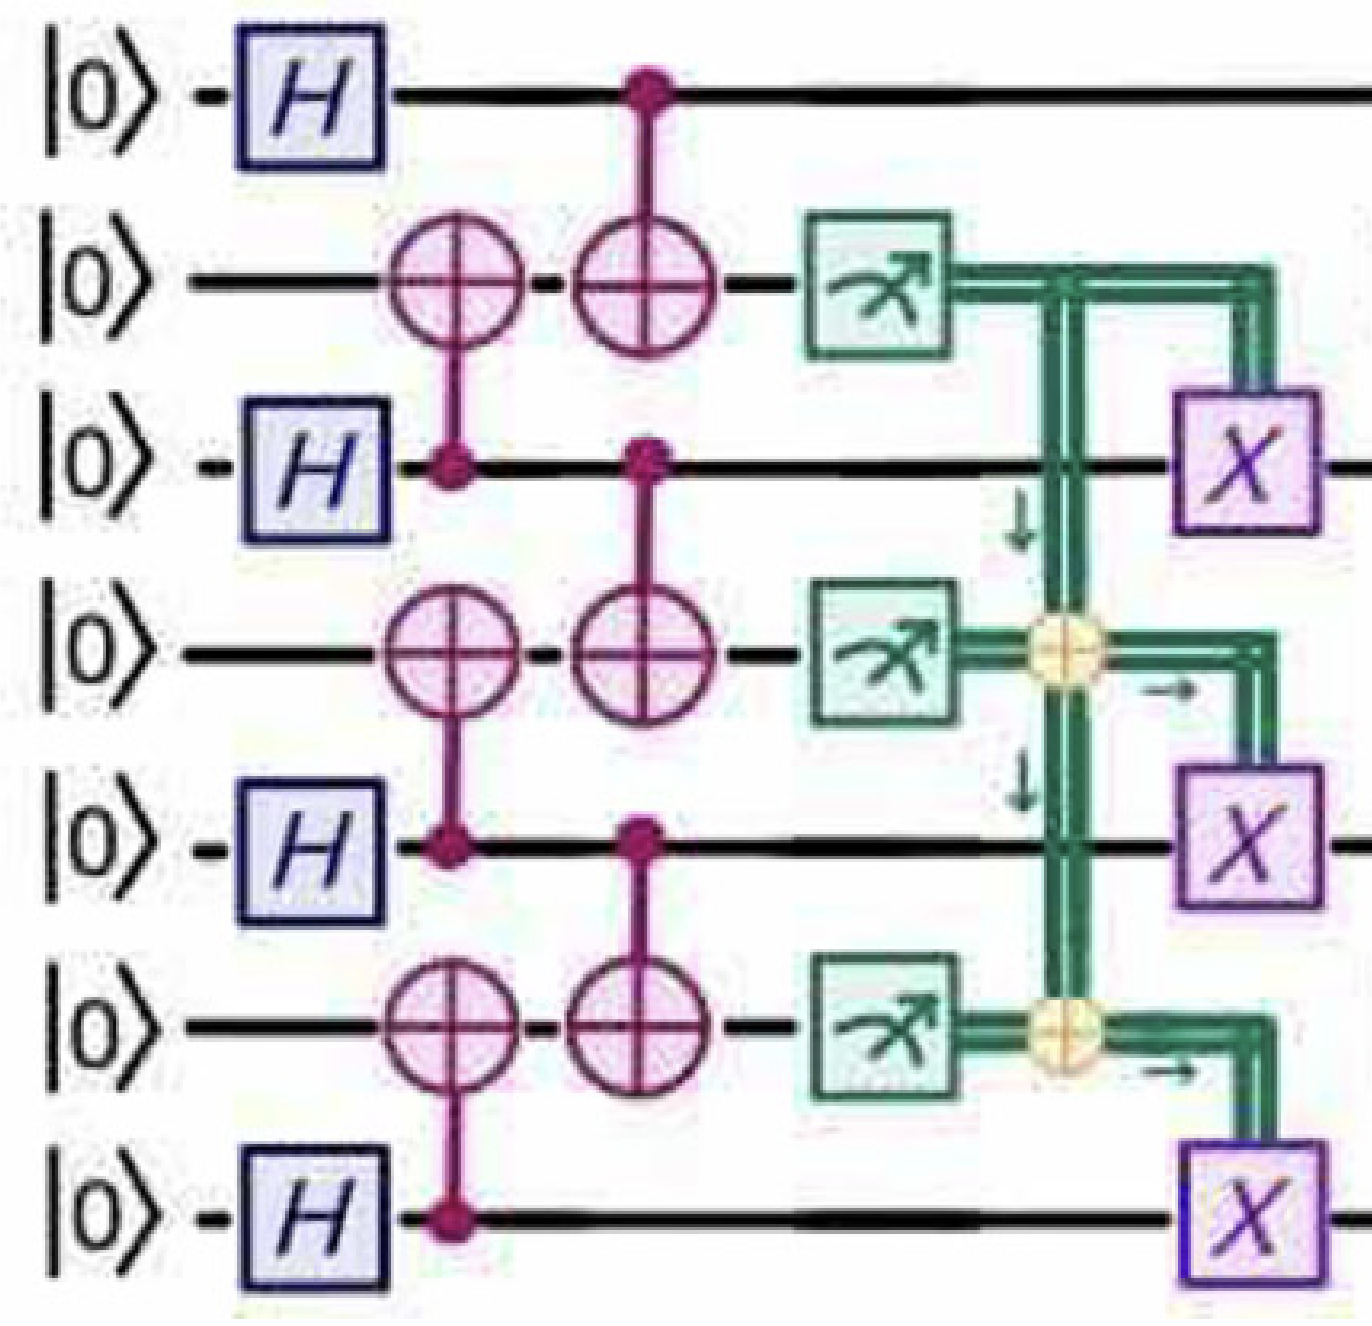


In [25]:

def ghz_constant_depth(n_qubits: int):

    @squin.kernel
    def main() -> Register:
        qreg = squin.qubit.new(n_qubits)
        ancilla = squin.qubit.new(n_qubits - 1)
        h = squin.op.h()
        cx = squin.op.cx()
        x = squin.op.x()
        
        for i in range(n_qubits):
            squin.qubit.apply(h, qreg[i])
            
        for i in range(n_qubits-1):
            squin.qubit.apply(cx, [qreg[i], ancilla[i]])
        for i in range(n_qubits-1):
            squin.qubit.apply(cx, [qreg[i+1], ancilla[i]])
            
        parity:int = 0
        bits = squin.qubit.measure(ancilla)
        for i in range(n_qubits-1):
            parity = parity ^ bits[i]
            if parity == 1:
                squin.qubit.apply(x, qreg[i+1])
        return qreg
    
    return main



In [26]:
# At this point, you know the drill. We can simulate this with multirun via PyQrack
emulator = StackMemorySimulator(min_qubits=7)
task = emulator.task(ghz_constant_depth(3))

state = multistate(task, nshots=1000)
# Even though there is measurement and feedforward, the final state is still pure. Neat!
print(state)


EighResult(eigenvalues=array([1.00000008]), eigenvectors=array([[-0.70710678+0.00000000e+00j],
       [ 0.        +0.00000000e+00j],
       [ 0.        +0.00000000e+00j],
       [ 0.        +0.00000000e+00j],
       [ 0.        +0.00000000e+00j],
       [ 0.        +0.00000000e+00j],
       [ 0.        +0.00000000e+00j],
       [-0.70710678-1.38368074e-18j]]))


 As a final note, consider how difficult it would be to represent this circuit in Cirq. In particular, there is a for loop, where inside the for loop there is an algebraic operation (XOR) that feeds forward onto a variable (parity). This circuit is inexpressible in Cirq without some serious hacking of ancilla qubit registers.